# CLASSIFICATION Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM CBB3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### Problem Statement

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### Data overview
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

# Team Supervisor
- Chris Barnett

# TEAM CBB3 MEMBERS
- 1. Elelwani Tshikovhi (Team Leader);
- 2. Katlego Maponya (Team coordinator) ;
- 3. Musa Mashaba ;
- 4. Zwothandwa Kunene ;
- 5. Sinethemba Nongqoto;
- 6. Desree Maleka


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

In [1]:
pip install gensim

In [2]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Import all the  **libraries**

In [3]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
# Modelling
from tqdm import tqdm
#rom gensim.models.doc2vec import LabeledSentence 
import gensim
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from scipy import stats 
# Metrics for Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics precision_score
from sklearn.metrics recall_score
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Downloads
nltk.download(['punkt','stopwords'])
%matplotlib inline
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Download NLTK Corpora
Some of the `nltk` text processing methods introduced in this train involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, we need to first download the corpora we're going use, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

In [4]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

pip install comet version control

In [3]:
!pip3 install comet_ml

**Comet** provides a central place for my team to track their ML experiments and models so we can seamlessly compare and share experiments, debug and stop underperforming models

In [5]:
# Import comet_ml at the top 
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/84a65e634b344a5f99c9bf46ce717a87



*   [Trello Link](https://trello.com/b/2KvEPRJi/advanced-classificatin-team-cbb3-week-1)
*   [Link to comet](https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/view/new/panels)
*   [Link to Github](https://github.com/TEAMCBB3Classificationpredict)
*   [Link to streamlit]( http://34.244.129.101:5000)
*   [link to presentation](https://docs.google.com/presentation/d/19E1pbrp_lXfBG3FyOsz43QQRqq-qd7eGtp00w7nESCs/edit#slide=id.p)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

The training and testing data respectively are loaded as Pandas DataFrames

In [6]:
# Load train data
train = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/train.csv')

# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/test_with_no_labels.csv')

In [7]:
#To view the first 10 row of the data to see how it looks like
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---


### Shape of Dataframe

In [11]:
print('Train shape : rows, columns:',train.shape)
print('test shape : rows, columns:',test.shape)

Train shape : rows, columns: (15819, 3)
test shape : rows, columns: (10546, 2)


The **train** has `15819 rows and 3 columns!` while **test data** has `10546 rows and  just 2 columns!`

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Train data has 2 numerical culumns and 1 categorical column

### Get Statistical Info of all features

In [8]:
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


The statistical summary doesnt no give out alot of information since most of the data is ordinal we can see by the 25%,50% and 75% quartile the value is 1 , means 1 is the most occuring sentiment in this data set 

### Check for nulls

In [9]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

NO empty cells or values 

In [10]:
# Create class distribution dataframe
sentiment_counts = train.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts


,sentiment,counts
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


Most occuring sentiment is 1 and least occuring setiment is -1 which means there is a high percentage of tweet that are for climate change than anti climate change

### Histogram and density plot

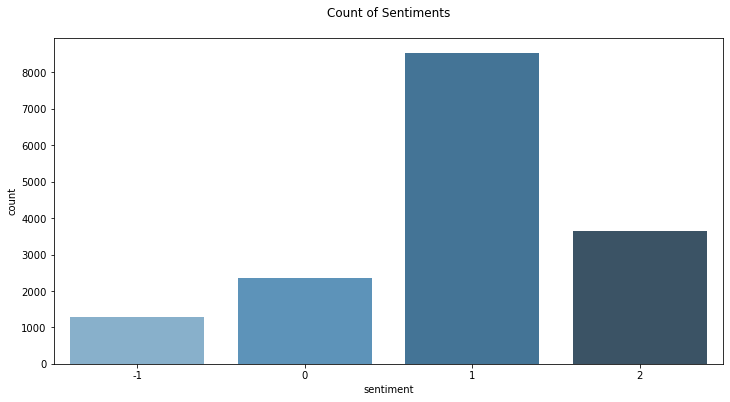

In [11]:
#bar graph to show the semtiments 
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train, palette="Blues_d")
plt.title('Count of Sentiments\n')
plt.show()

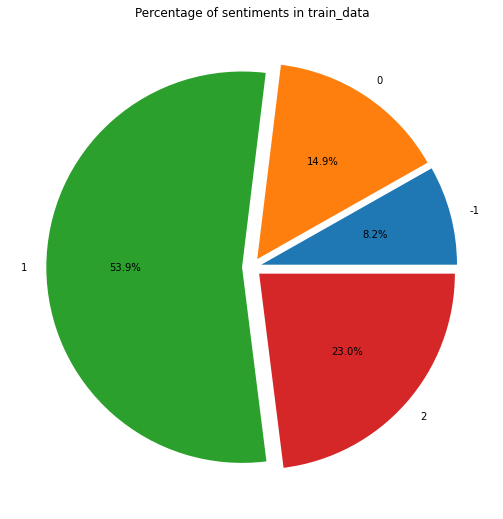

In [12]:
#pie chart to show the sentiment percentages 
senti = train.groupby('sentiment', as_index=False).count()
fig = plt.subplots(figsize=(14,9))
plt.pie(senti['message'], labels = senti['sentiment'].astype('str'), autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Percentage of sentiments in train_data')
plt.show()

In [13]:
df_train = train.copy()

<Figure size 1440x1080 with 0 Axes>

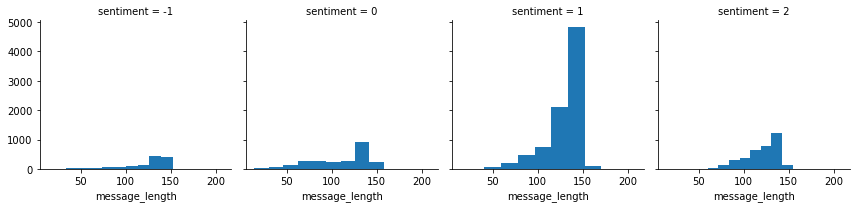

In [14]:
#Plot the distribution of the tweet length per csentiment using a histogram.
plt.figure(figsize=(20,15))
df_train['message_length'] = df_train['message'].apply(len)
g = sns.FacetGrid(df_train,col='sentiment')
g.map(plt.hist,'message_length') 
plt.show()

Sentiment 1 has the highest distribution of long message length highly concentrated between 110-150 and sentiment -1 has the least distribution of message length

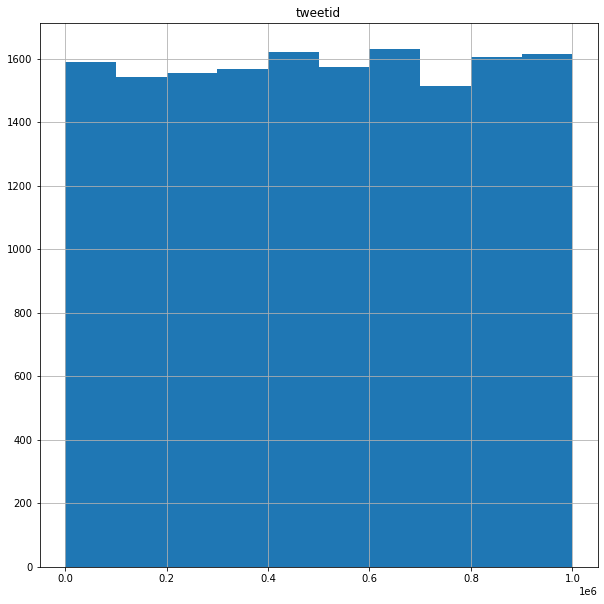

In [15]:
features = ['tweetid']
df_train[features].hist(figsize=(10,10));

Plot Of Top 15 message Of Tweet

c:\Users\f5468981\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\f5468981\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


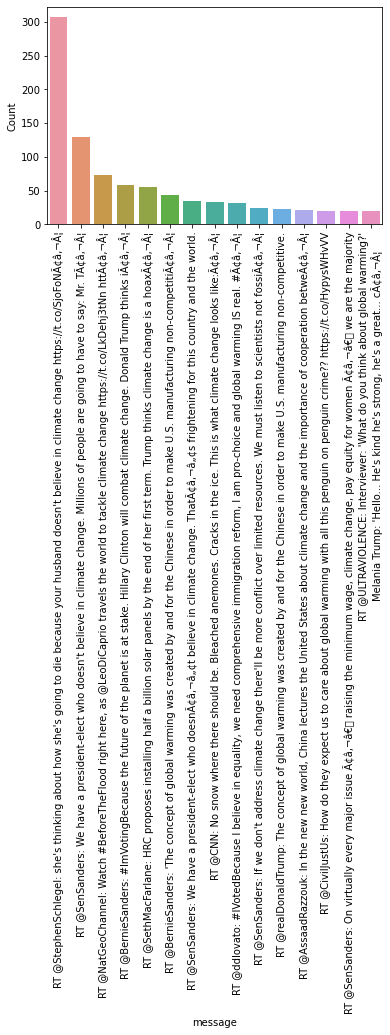

In [16]:
loc_df=df_train['message'].value_counts().reset_index().rename(columns={'index':'message','message':'Count'}).sort_values('Count',ascending=False).head(15)
sns.barplot(loc_df['message'],loc_df['Count'])
plt.xticks(rotation = 90)
plt.show()

#  BOX PLOT 

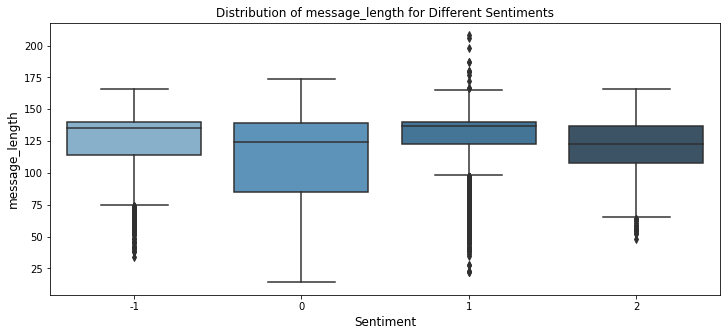

In [17]:
#box plot to show the distribution of message length per sentiment
fig,axis = plt.subplots(figsize=(12,5)) 
sns.boxplot(x='sentiment',y='message_length',data=df_train,palette=("Blues_d")) 
plt.title('Distribution of message_length for Different Sentiments', fontsize = 12) 
plt.xlabel('Sentiment', fontsize = 12) 
plt.ylabel('message_length', fontsize = 12) 
plt.show()

# Insights
### sentiments -1,1 and 2 have outliers 
- sentiment 1 has a lot of unsual short and long message length which can be seen as outliers 
- sentiment 0 messages length is perfectly skewed to the left   with  no outliers
- sentiment -1,0,1 are skewed tothe left and 2 is not 

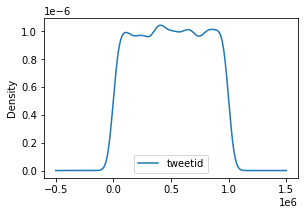

In [18]:
df_train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

<AxesSubplot:>

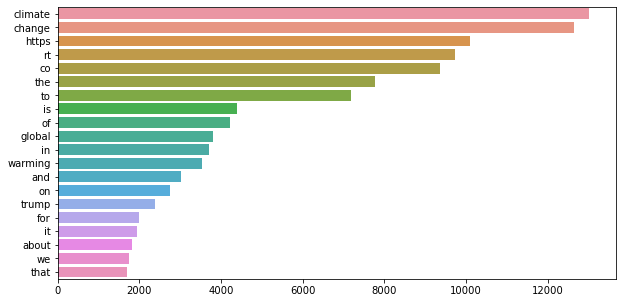

In [21]:
# Visualize current state of data
# Function returns a unigram
def top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_unigram = top_tweet_unigrams(df_train['message'])[:20]
x,y = map(list,zip(*top_tweet_unigram))
sns.barplot(x=y, y=x)

 *climate* is the most used single word  in this tweets data follwed by change.
 reasons why 
 - most twitter users would used climate change as a # 
 this apply for both unigram and bigram

<AxesSubplot:>

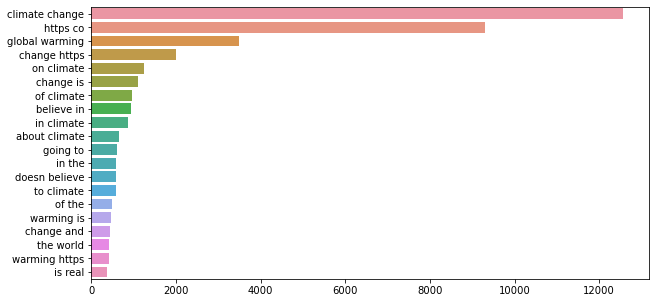

In [22]:
# Function returns a bigram
def top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigram = top_tweet_bigrams(df_train['message'])[:20]
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(x=y,y=x)

### Non graphical multivariate analysis

Calculating the correlation to see if there is a relationship between sentimentnts .tweetid and messagelenth. We can see below  there is come good correlation between sentiments and tweet length

In [23]:
df_train.corr()

,sentiment,tweetid,message_length
sentiment,1.000000,-0.003758,0.052893
tweetid,-0.003758,1.000000,0.005774
message_length,0.052893,0.005774,1.000000


### Multivariate analysis: Graphical


#### Heatmap

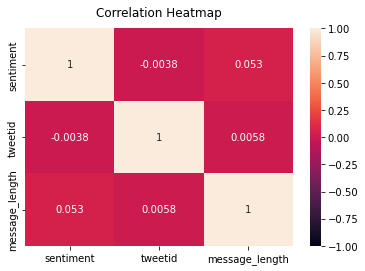

In [24]:
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(train.tweetid,hue=train.Sentiment,hue_order=['-1', '0', '1', '2'])
plt.xticks(rotation = 90)
plt.show()

for the test data

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [309]:
df = train.copy()

# **Tweets Data Preprocessing and Cleaning** 
The preprocessing of the text data is an essential step as it makes the raw text ready for modelling , we remove  noisy and inconsistent data

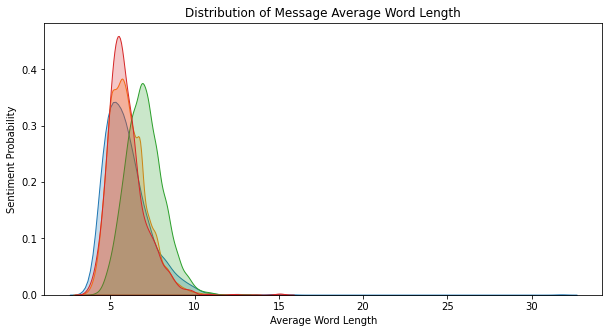

In [236]:
#Function to find average word length 
def avg_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

# Broadcast to text column
df['avg_word_length'] = df['message'].apply(avg_word_length)

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(df['avg_word_length'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['avg_word_length'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['avg_word_length'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['avg_word_length'][df['sentiment'] == -1], shade = True, label = 'Anti')

# Set title
plt.title('Distribution of Message Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Sentiment Probability')

# Plot graphs
plt.show()

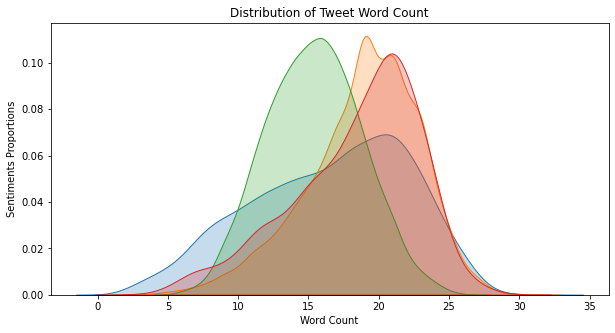

In [237]:
# Column for the number of words in message
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(df['word_count'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['word_count'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['word_count'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['word_count'][df['sentiment'] == -1], shade = True, label = 'Anti')

# Set title and plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiments Proportions')
plt.show()

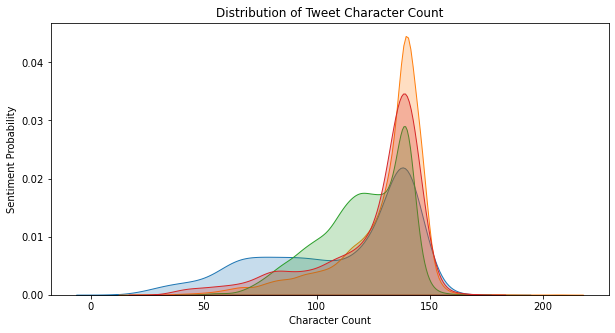

In [238]:
# Column for the number of characters in a message
df['character_count'] = df['message'].apply(lambda x: len(x))

# Split so we can use updated train set with new feature
df = df[:len(df)]

# Define subplot to see graphs side by side
fig = plt.subplots(figsize = (10, 5))

# Create graphs
sns.kdeplot(df['character_count'][df['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(df['character_count'][df['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(df['character_count'][df['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(df['character_count'][df['sentiment'] == -1], shade = True, label = 'Anti')


# Set title and plot
plt.title('Distribution of Tweet Character Count')
plt.xlabel('Character Count')
plt.ylabel('Sentiment Probability')
plt.show()

In [239]:
# convert text into numbers
def sentiment(df):
    """
    This function converts the sentiments from
    numbers into words

    Input:
    dataframe: original tweets
    datatype: Dataframe

    output:Dataframe
    datatype: dataframe

    """
    sentiment = df['sentiment']
    sentiment_class = []
    for i in sentiment:
        if i == 1:
            sentiment_class.append('Pro')
        elif i == 0:
            sentiment_class.append('Neutral')
        elif i == -1:
            sentiment_class.append('Anti')
        else:
            sentiment_class.append('News')

    df['sentiment'] = sentiment_class
    return df
df = sentiment(df)
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,6.421053,19,140
1,Pro,It's not like we lack evidence of anthropogeni...,126103,5.300000,10,62
2,News,RT @RawStory: Researchers say we have three ye...,698562,6.421053,19,140
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5.666667,15,99
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,5.833333,18,122
5,Pro,Worth a read whether you do or don't believe i...,425577,6.928571,14,110
6,Pro,RT @thenation: Mike Pence doesn’t believe in g...,294933,6.500000,16,119
7,Pro,RT @makeandmendlife: Six big things we can ALL...,992717,5.652174,23,152
8,Pro,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,4.600000,25,139
9,Pro,RT @paigetweedy: no offense… but like… how do ...,260471,4.933333,15,88


In [240]:
# Extract the hashtags from the tweets
def extract_hashtags(df):

    df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
    df['hashtags'].apply(lambda x: np.nan if len(x) == 0 else [x.lower() for x in x])
    return df
    
extract_hashtags(df)


,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,6.421053,19,140,[]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,5.300000,10,62,[]
2,News,RT @RawStory: Researchers say we have three ye...,698562,6.421053,19,140,[]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5.666667,15,99,[#TodayinMaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,5.833333,18,122,[#ElectionNight]
...,...,...,...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,5.409091,22,140,[]
15815,News,RT @washingtonpost: How climate change could b...,17856,8.230769,13,119,[]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,6.052632,19,133,[]
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,5.142857,21,128,[#Agenda2030.]


# Extracting hashtags for each Sentiment

In [ ]:
News = hashtag_extract(df['message'][df['Sentiment'] == 'News'])
Pro = hashtag_extract(df['message'][df['Sentiment'] == 'Pro'])
Neutral = hashtag_extract(df['message'][df['Sentiment'] == 'Neutral'])
Anti = hashtag_extract(df['message'][df['Sentiment'] == 'Anti'])

In [ ]:
#removing the listing
News = sum(News [])
Pro = sum(Pro, [])
Neutral = sum(Neutral, [])
Anti = sum(Anti,[])


In [ ]:
# making frequency distribution top 10 Pro hashtags
k = nltk.FreqDist(Pro)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 News hashtags
k = nltk.FreqDist(News)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Neutral hashtags
k = nltk.FreqDist(Neutral)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [ ]:
# making frequency distribution top 10 Anti hashtags
k = nltk.FreqDist(Anti)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [86]:
pip install demoji

In [21]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [308]:
pip install git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras

  Cloning https://github.com/nexxt-intelligence/DeepMoji (to revision tf-keras) to c:\users\f5468981\appdata\local\temp\pip-req-build-liy2ltjk
  Resolved https://github.com/nexxt-intelligence/DeepMoji to commit 9a9b1ca05ff71460aec64a6acd371ef1ccf0f7d4
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/nexxt-intelligence/DeepMoji 'C:\Users\f5468981\AppData\Local\Temp\pip-req-build-liy2ltjk'
  Running command git checkout -b tf-keras --track origin/tf-keras
  branch 'tf-keras' set up to track 'origin/tf-keras'.
  Switched to a new branch 'tf-keras'
ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from deepmoji) (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow==2.1.0


In [241]:

import emoji
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [242]:
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']!='']['emoji']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emoji, Length: 179, dtype: object

In [243]:
#convert emojies on the dataframe to text 
def text_emoji(txt):
  emoji_converter = emoji.demojize(txt, delimiters=("", ""))
  return emoji_converter

In [244]:
df['message'] = df['message'].apply(text_emoji)
df.loc[56:60]

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
56,Anti,@MissLizzyNJ lmao face_with_tears_of_joy snowf...,911385,5.928571,14,96,[],😂❄❄🤦♂
57,Anti,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263,5.714286,21,140,[],
58,Neutral,@GlennF They are calling to the great Space Cy...,113396,4.800000,15,86,[],
59,Pro,RT @GreenpeaceEAsia: Pollution from India and ...,526281,6.000000,17,119,[],
60,Pro,RT @UNEP: The @citiesclimfin lays out how citi...,774850,6.000000,17,118,[],


we can see there are no emoji on the messages 

In [245]:
# Check duplicate messages in the training data
dupl_train = df['message']
dupl_train = df[dupl_train.isin(dupl_train[dupl_train.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the training data and to see that each message is unique
dupl_tweet_id = df['tweetid']
df[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# Check for duplicate messages in the testing data
dupl_test = test['message']
dupl_test = test[dupl_test.isin(dupl_test[dupl_test.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the testing data and to see that each message is unique
dupl_tweet_id = test['tweetid']
test[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# View percentage of duplicates in our datasests
dupl_train_prop = (len(dupl_train)/len(df['message']))*100
dupl_test_prop = (len(dupl_test)/len(test['message']))*100
print('Train data percentange of Retweets:',str(round((dupl_train_prop),3))+"%")
print('Test data percentage of Retweets:',str(round((dupl_test_prop),3))+"%")

Train data percentange of Retweets: 12.061%
Test data percentage of Retweets: 11.037%


In [246]:
dupl_test.head(7)

,message,tweetid
5094,How can people be so ignorant when it comes to...,618984
9691,How can people be so ignorant when it comes to...,353129
960,Obamas fiddled global warming data: *Shameless...,818493
4866,Obamas fiddled global warming data: *Shameless...,122281
3341,RT @1followernodad: ok a climate change denier...,543287
4978,RT @1followernodad: ok a climate change denier...,176463
9601,RT @1followernodad: ok a climate change denier...,345248


In [247]:
df.shape

(15819, 8)

In [248]:
#removinging @handles
#function for removing @user
def remove_user(input_txt):
    user_pattern = '@[\w]*'
    r = re.findall(user_pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt

In [249]:
# remove twitter handles (@user) from train data
df['message'] =df['message'].apply(remove_user)


In [250]:
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,6.421053,19,140,[],
1,Pro,It's not like we lack evidence of anthropogeni...,126103,5.300000,10,62,[],
2,News,RT : Researchers say we have three years to a...,698562,6.421053,19,140,[],
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,"RT : It's 2016, and a racist, sexist, climate...",466954,5.833333,18,122,[#ElectionNight],
5,Pro,Worth a read whether you do or don't believe i...,425577,6.928571,14,110,[],
6,Pro,RT : Mike Pence doesn’t believe in global war...,294933,6.500000,16,119,[],
7,Pro,RT : Six big things we can ALL do today to fi...,992717,5.652174,23,152,[],
8,Pro,My 8yo nephew is inconsolable. He wants to d...,664510,4.600000,25,139,[],
9,Pro,RT : no offense… but like… how do you just no...,260471,4.933333,15,88,[],


### Tweet Cleaning
The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

In [251]:
import re
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def process_tweet(tweet):
    """
    Process tweet function.
    Input:
        tweet: a string containing a tweet
    Returns:
        tweets_clean: a list of words containing the processed tweet
        """
    stemmer = PorterStemmer()
    # removing @mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet))
    tweet = re.sub(r'@[A-Za-zA-Z0-9]+', '',str(tweet))
    tweet= re.sub(r'@[A-Za-z]+', '',str(tweet))
    tweet = re.sub(r'@[-)]+', '', str(tweet))
    # remove the '&gt;'
    tweet= re.sub(r'&[a-z;]+', '', str(tweet))
    tweet= re.sub(r'\$\w*', '', str(tweet))
    # remove old style retweet text "RT"
    tweet = re.sub('#(RT|rt)*', '', str(tweet))
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', str(tweet))
    # remove hashtags
    # Remove Numbers and words with Num
    tweet = re.sub('\w*\d\w*', '', str(tweet))
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', str(tweet))
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', str(tweet))
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', str(tweet))
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')
    tweet = re.sub(r"U+FFFD ", ' ', str(tweet))
    # remove special characters, numbers, punctuations from train data
    tweet = re.sub("[^a-zA-Z#]", " ",str(tweet))
    
    return tweet.lower()
    

In [252]:
# cleaning the text of train data
df['message'] = df['message'].apply(lambda x: process_tweet(x))

# show the cleaned text 
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,6.421053,19,140,[],
1,Pro,it s not like we lack evidence of anthropogeni...,126103,5.300000,10,62,[],
2,News,rt researchers say we have three years to act ...,698562,6.421053,19,140,[],
3,Pro,todayinmaker wired was a pivotal year in the w...,573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,rt it s and a racist sexist climate change den...,466954,5.833333,18,122,[#ElectionNight],
5,Pro,worth a read whether you do or don t believe i...,425577,6.928571,14,110,[],
6,Pro,rt mike pence doesn t believe in global warmin...,294933,6.500000,16,119,[],
7,Pro,rt six big things we can all do today to fight...,992717,5.652174,23,152,[],
8,Pro,my nephew is inconsolable he wants to die of o...,664510,4.600000,25,139,[],
9,Pro,rt no offense but like how do you just not b...,260471,4.933333,15,88,[],


Removing stop words

In [253]:
stop_list=list(stopwords.words('english'))

# Removing StopWord
def Change_text(tweet):
  main_text=[word for word in tweet.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [254]:
# Stop words Removal from train data
df['message'] = df['message'].apply(Change_text)
df.head()

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,polyscimajor epa chief think carbon dioxide ma...,625221,6.421053,19,140,[],
1,Pro,like lack evidence anthropogenic global warming,126103,5.300000,10,62,[],
2,News,rt researchers say three years act climate cha...,698562,6.421053,19,140,[],
3,Pro,todayinmaker wired pivotal year war climate ch...,573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,rt racist sexist climate change denying bigot ...,466954,5.833333,18,122,[#ElectionNight],


# Removing Short Words

In [255]:
# remove short words
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,polyscimajor epa chief think carbon dioxide ma...,625221,6.421053,19,140,[],
1,Pro,like lack evidence anthropogenic global warming,126103,5.300000,10,62,[],
2,News,researchers say three years act climate change...,698562,6.421053,19,140,[],
3,Pro,todayinmaker wired pivotal year war climate ch...,573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,racist sexist climate change denying bigot lea...,466954,5.833333,18,122,[#ElectionNight],
5,Pro,worth read whether believe climate change,425577,6.928571,14,110,[],
6,Pro,mike pence believe global warming smoking caus...,294933,6.500000,16,119,[],
7,Pro,six big things today fight climate change clim...,992717,5.652174,23,152,[],
8,Pro,nephew inconsolable wants die old age like per...,664510,4.600000,25,139,[],
9,Pro,offense like believe global warming,260471,4.933333,15,88,[],



### 1. Tokenization

It consists in dividing the texts into words or smaller sub-texts, allowing us to determine the “vocabulary” of the dataset (set of unique tokens present in the data). Usually we use word-level representation. For our exemple we will use NLTK Tokenizer()



In [256]:
# Tokenizinging tweet train data
df['message'] = df['message'].apply(lambda x: x.split())
df.head()

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,"[polyscimajor, epa, chief, think, carbon, diox...",625221,6.421053,19,140,[],
1,Pro,"[like, lack, evidence, anthropogenic, global, ...",126103,5.300000,10,62,[],
2,News,"[researchers, say, three, years, act, climate,...",698562,6.421053,19,140,[],
3,Pro,"[todayinmaker, wired, pivotal, year, war, clim...",573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,"[racist, sexist, climate, change, denying, big...",466954,5.833333,18,122,[#ElectionNight],


Stemming

In [257]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
df['message'] = df['message'].apply(lambda x: [stemmer.stem(i) for i in x])

In [258]:
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,Pro,"[polyscimajor, epa, chief, think, carbon, diox...",625221,6.421053,19,140,[],
1,Pro,"[like, lack, evid, anthropogen, global, warm]",126103,5.300000,10,62,[],
2,News,"[research, say, three, year, act, climat, chan...",698562,6.421053,19,140,[],
3,Pro,"[todayinmak, wire, pivot, year, war, climat, c...",573736,5.666667,15,99,[#TodayinMaker#],
4,Pro,"[racist, sexist, climat, chang, deni, bigot, l...",466954,5.833333,18,122,[#ElectionNight],
5,Pro,"[worth, read, whether, believ, climat, chang]",425577,6.928571,14,110,[],
6,Pro,"[mike, penc, believ, global, warm, smoke, caus...",294933,6.500000,16,119,[],
7,Pro,"[six, big, thing, today, fight, climat, chang,...",992717,5.652174,23,152,[],
8,Pro,"[nephew, inconsol, want, die, old, age, like, ...",664510,4.600000,25,139,[],
9,Pro,"[offens, like, believ, global, warm]",260471,4.933333,15,88,[],


In [259]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 'Pro' :
          sentiment_class.append(1)
      elif i == 'Neutral' :
          sentiment_class.append(0)
      elif i == 'Anti' :
          sentiment_class.append(-1)
      else :
          sentiment_class.append(2)

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df.copy())
df.head()

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221,6.421053,19,140,[],
1,1,"[like, lack, evid, anthropogen, global, warm]",126103,5.300000,10,62,[],
2,2,"[research, say, three, year, act, climat, chan...",698562,6.421053,19,140,[],
3,1,"[todayinmak, wire, pivot, year, war, climat, c...",573736,5.666667,15,99,[#TodayinMaker#],
4,1,"[racist, sexist, climat, chang, deni, bigot, l...",466954,5.833333,18,122,[#ElectionNight],


In [260]:
tokenized_message =df['message']

In [261]:
# join tokens into one sentence
for i in range(len(tokenized_message)):
    tokenized_message[i] = ' '.join(tokenized_message[i])
# change df['message'] to tokenized_tweet

C:\Users\f5468981\AppData\Local\Temp/ipykernel_15008/1535032159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokenized_message[i] = ' '.join(tokenized_message[i])


In [262]:
df['message']=tokenized_message

In [263]:
df.head(10)

,sentiment,message,tweetid,avg_word_length,word_count,character_count,hashtags,emoji
0,1,polyscimajor epa chief think carbon dioxid mai...,625221,6.421053,19,140,[],
1,1,like lack evid anthropogen global warm,126103,5.300000,10,62,[],
2,2,research say three year act climat chang late,698562,6.421053,19,140,[],
3,1,todayinmak wire pivot year war climat chang,573736,5.666667,15,99,[#TodayinMaker#],
4,1,racist sexist climat chang deni bigot lead pol...,466954,5.833333,18,122,[#ElectionNight],
5,1,worth read whether believ climat chang,425577,6.928571,14,110,[],
6,1,mike penc believ global warm smoke caus lung c...,294933,6.500000,16,119,[],
7,1,six big thing today fight climat chang climat ...,992717,5.652174,23,152,[],
8,1,nephew inconsol want die old age like perish f...,664510,4.600000,25,139,[],
9,1,offens like believ global warm,260471,4.933333,15,88,[],


# Visualisation of data

The common words used in the tweets: WordCloud

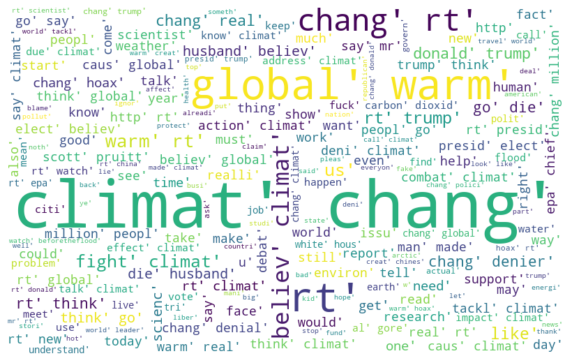

In [173]:
# create text from all tweets
all_words = ' '.join([str(text) for text in df['message']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

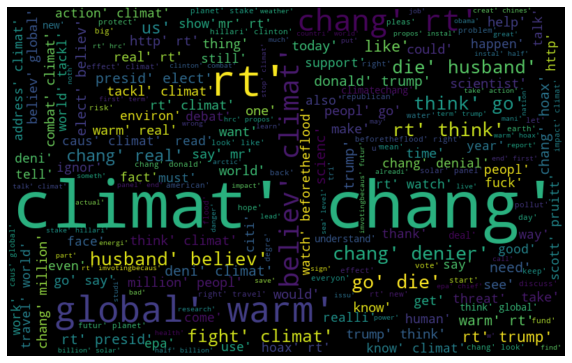

In [183]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

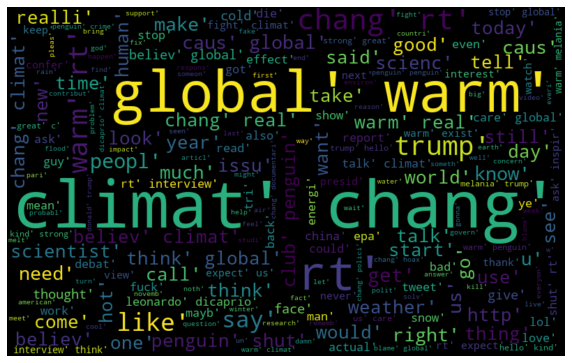

In [184]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

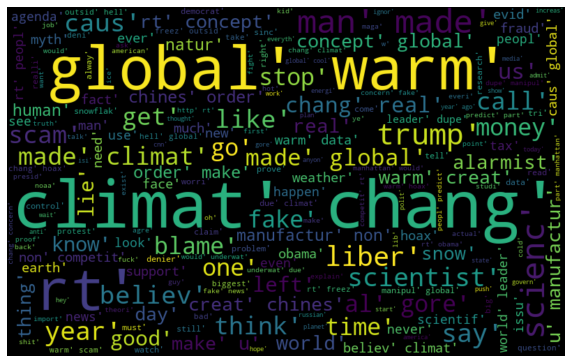

In [185]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

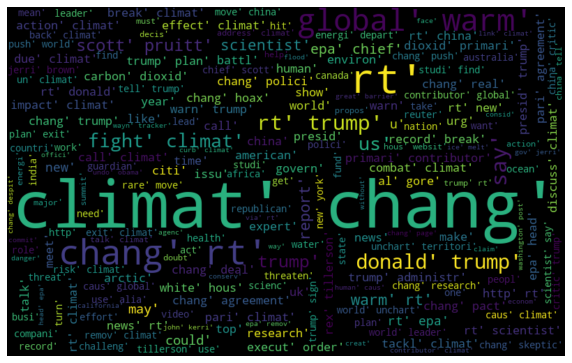

In [186]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [188]:
df.columns

Index(['sentiment', 'message', 'tweetid', 'avg_word_length', 'word_count',
       'character_count', 'hashtags', 'emoji', 'messagr'],
      dtype='object')

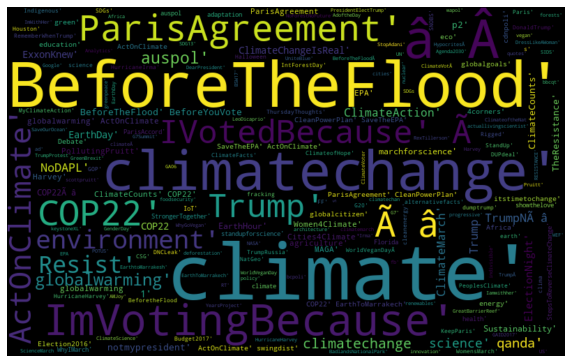

In [189]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Preprocessing the test data


In [56]:
df_test=test.copy()

In [57]:
# Extract the hashtags from the tweets from the test data

def extract_hashtags(df_test):

  df_test['hashtags'] = df_test['message'].str.findall(r'#.*?(?=\s|$)')
  df_test['hashtags'] = df_test['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df_test

extract_hashtags(df_test)

,message,tweetid,hashtags
0,Europe will now be looking to China to make su...,169760,NaN
1,Combine this with the polling of staffers re c...,35326,NaN
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,"[#climatechange, #science, #poetry, #fakenews,..."
10542,2016: the year climate change came home: Durin...,875167,NaN
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,[#aldublaboroflove]


In [58]:
import emoji
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [59]:
df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']!='']['emoji']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emoji, Length: 120, dtype: object

In [ ]:
df_test['message'] = df_test['message'].apply(text_emoji)
df_test.loc[98:100]

In [60]:
# remove twitter handles (@user) from test data
df_test['message'] =df_test['message'].apply(remove_user))

In [61]:
# cleaning the text of train data
df_test['message'] = df_test['message'].apply(lambda x: process_tweet(x))

# show the cleaned text 
df_test.head(10)

,message,tweetid,hashtags,emoji
0,europe will now be looking to china to make su...,169760,NaN,
1,combine this with the polling of staffers re c...,35326,NaN,
2,the scary unimpeachable evidence that climate ...,224985,"[#itstimetochange, #climatechange]",
3,putin got to you too jill trump doesn t believ...,476263,NaN,
4,rt female orgasms cause global warming sarcas...,872928,NaN,
5,rt trump muzzles employees of several gov t ag...,75639,[#climate],
6,yes wrote that in yr comp sci ethics part was ...,211536,NaN,
7,rt indonesian farmers weather climate change w...,569434,[#climate],
8,rt british scientists face a huge hit if the...,315368,NaN,
9,aid for agriculture sustainable agriculture ...,591733,NaN,


In [ ]:
# Stop words Removal from train data
df_test['message'] = df_test['message'].apply(Change_text)

### Removing Short Words

In [ ]:
#remove short words
df_test['message'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))


In [63]:
# Remove Line breaks: test
df_test['message']=df_test['message'].replace('\n', ' ')

1. Tokenization

In [64]:
# Tokenizinging tweet test data
df_test['message'] = df_test['message'].apply(lambda x: x.split())


,message,tweetid,hashtags,emoji
0,"[europe, will, now, be, looking, to, china, to...",169760,NaN,
1,"[combine, this, with, the, polling, of, staffe...",35326,NaN,
2,"[the, scary, unimpeachable, evidence, that, cl...",224985,"[#itstimetochange, #climatechange]",
3,"[putin, got, to, you, too, jill, trump, doesn,...",476263,NaN,
4,"[rt, female, orgasms, cause, global, warming, ...",872928,NaN,


In [ ]:
# apply stemmer for tokenized_tweet
df_test['message'] = df_test['message'].apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
tokenized_message =df_test['message']
# join tokens into one sentence
for i in range(len(tokenized_message)):
    tokenized_message[i] = ' '.join(tokenized_message[i])
# change df['message'] to tokenized_tweet

In [ ]:
df_test['message']=tokenized_message

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

In [264]:
# Seperate features and tagret variables
y = df['sentiment']
X = df['message']

In [42]:
X.shape

(15819,)

# **Option 1** 
Changing text into something readable by machine learning model
- TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction ,It uses matrix 

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

# **Option 2** 
Changing text into something readable by machine learning model.
- CounterVectorizer This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction ,Convert a collection of text documents to a matrix of token counts

In [266]:
cv = CountVectorizer(ngram_range=(2, 3),analyzer = 'word',stop_words='english')
x_vectorised = cv.fit_transform(X)

Choose option 1 or 2 

we split the data after choosing one of the options above

In [267]:
# Split the train data to create validation dataset
X_train,X_test,y_train,y_test = train_test_split(x_vectorised,y,test_size=0.1,shuffle=True, stratify=y, random_state=42)

In [268]:
X_train.shape

(14237, 124648)

# Building classification models!

## 5.1 Logistic Regression  model

In [273]:
modelstart = time.time()
logreg = LogisticRegression(C= 1000, 
        max_iter= 10,
        multi_class='ovr',
        random_state= 42,
        solver= 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("accuracy of the model is {}".format(logreg.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "LogisticRegression",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'C': 100,
    'max_iter': 10,
    'multi_class': 'ovr',
    'solver':  'saga',
    "stratify" : True"
 }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy 0.6624525916561315
Model Runtime: 0.86 seconds
              precision    recall  f1-score   support

          -1       0.78      0.19      0.31       130
           0       0.56      0.31      0.40       235
           1       0.65      0.92      0.76       853
           2       0.75      0.46      0.57       364

    accuracy                           0.66      1582
   macro avg       0.69      0.47      0.51      1582
weighted avg       0.67      0.66      0.63      1582



c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


hypertuning the Logistic regression classifier

In [271]:
LogisticRegression().get_params()
param_grid = {'C': [100,1000,500],
              'max_iter': [10,50,100],
              'multi_class': ['ovr', 'multinomial'],
              'random_state': [42],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
            }
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1,verbose =5)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_test)
print("Best parameters:")
lr_params = grid_LR.best_params_
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.6484705  0.65106513 0.64708967 0.6439004  0.62424673        nan
 0.65376332 0.62975092 0.65102762 0.63968964 0.64666522 0.6463865
 0.64880535 0.65575261 0.65358633        nan 0.64744072 0.64622096
 0.65665995 0.65436363 0.64659201 0.6463865  0.64522744 0.65687744
 0.65582856        nan 0.64744072 0.64695269 0.65616943 0.65654722
 0.64399738 0.64981623 0.64731475 0.64384416 0.6243298         nan
 0.65301089 0.63017815 0.65102762 0.63956418 0.64387016 0.64389204
 0.64549759 0.65584165 0.65358633        nan 0.64483208 0.64416438
 0.65666617 0.65425587 0.64390376 0.64389204 0.64509453 0.65671298
 0.65587103        nan 0.64483208 0.64236672 0.65627552 0.65639789
 0.64493866 0.65071004 0.64731475 0.64384416 0.6243298         nan
 0.65205452 0.630071   0.65102762 0.63956418 0.64548337 0.64484506
 0.64581012 0.65584165 0.65358633        nan 0.6442

Best parameters:
{'C': 100, 'max_iter': 100, 'multi_class': 'ovr', 'random_state': 42, 'solver': 'sag'}
accuracy 0.6814159292035398
              precision    recall  f1-score   support

          -1       0.69      0.28      0.40       130
           0       0.51      0.39      0.44       235
           1       0.70      0.86      0.77       853
           2       0.72      0.59      0.65       364

    accuracy                           0.68      1582
   macro avg       0.66      0.53      0.56      1582
weighted avg       0.68      0.68      0.66      1582



c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## 5.2 GradientBoostingClassifie

In [38]:
modelstart = time.time()
gbbc = GradientBoostingClassifier(n_estimators=100, loss= 'deviance',learning_rate=1.0, max_depth=1)
gbbc.fit(X_train, y_train)
y_pred = gbbc.predict(X_test)

print("accuracy of the model is {}".format(gbbc.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "gradient boosting",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'loss': 'deviance',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 1,
 }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

Accuracy 0.6662452591656132
Model Runtime: 55.39 seconds
              precision    recall  f1-score   support

          -1       0.59      0.33      0.42       648
           0       0.53      0.32      0.40      1177
           1       0.67      0.86      0.76      4265
           2       0.72      0.56      0.63      1820

    accuracy                           0.67      7910
   macro avg       0.63      0.52      0.55      7910
weighted avg       0.66      0.67      0.65      7910



### Hypertuning the GradientBoosting classier

In [29]:
GradientBoostingClassifier().get_params()
param_grid = {'loss': ['log_loss', 'deviance', 'exponential'],
              'learning_rate': [0.5,0.1],
              'n_estimators': [10,100],
              'random_state': [42],
              'max_depth': [3,10]
            }
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1,verbose =5)
grid_gbc.fit(X_train, y_train)
y_pred = grid_gbc.predict(X_test)
print("Best parameters:")
gbc_params = grid_gbc.best_params_
print(grid_gbc.best_params_)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.47459269 0.56473867 0.58336154
 0.56537221 0.60207485 0.61201632 0.55986196 0.60113109 0.61052593
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.51906294 0.58443692 0.59527532 0.58317029 0.6069132  0.61798066
 0.57623938 0.6071503  0.61665457        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.41590931 0.5006887  0.53253872
 0.49559198 0.56709312 0.5875894  0.48663382 0.56116677 0.58413723
        nan        nan        nan        nan      

Best parameters:
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
accuracy 0.6622418879056047
              precision    recall  f1-score   support

          -1       0.65      0.27      0.38       389
           0       0.63      0.19      0.29       706
           1       0.64      0.91      0.76      2559
           2       0.76      0.52      0.62      1092

    accuracy                           0.66      4746
   macro avg       0.67      0.47      0.51      4746
weighted avg       0.67      0.66      0.62      4746



## 5.3 RandomForestClassifier

In [39]:
modelstart = time.time()
rf = RandomForestClassifier(max_features=4, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("accuracy of the model is {}".format(rf.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Random Forest Classifier ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'max_features': 4,
     }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

Accuracy 0.697724399494311
Model Runtime: 21.97 seconds
              precision    recall  f1-score   support

          -1       0.88      0.19      0.32       648
           0       0.64      0.34      0.44      1177
           1       0.67      0.94      0.78      4265
           2       0.84      0.55      0.67      1820

    accuracy                           0.70      7910
   macro avg       0.76      0.50      0.55      7910
weighted avg       0.72      0.70      0.67      7910



In [59]:
RandomForestClassifier().get_params()
param_grid = { 'bootstrap':[True],
              'n_estimators': [10,20,50,100,150],
              'random_state': [42],
              'criterion':['gini', 'entropy', 'log_loss']
              }
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1,verbose =5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best parameters:")
gbc_params = grid_rf.best_params_
print(grid_rf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

## 5.4 Support vector machine

In [40]:
from sklearn.svm import SVC
modelstart = time.time() 
svc = SVC(kernel='linear',C = 0.25,gamma= 'scale',decision_function_shape='ovr)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("accuracy of the model is {}".format(svc.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Linear Support vector machine  ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'C':0.25,
    'gamma': 'scale',
    'decision_function_shape':'ovr }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)


The accuracy score of the SVC is: 0.7254108723135272


Classification Report:

               precision    recall  f1-score   support

          -1       0.82      0.32      0.46       648
           0       0.63      0.32      0.43      1177
           1       0.72      0.90      0.80      4265
           2       0.78      0.71      0.74      1820

    accuracy                           0.73      7910
   macro avg       0.74      0.56      0.61      7910
weighted avg       0.73      0.73      0.70      7910



### hypertuning  Support vector machine

In [41]:
#hypertuning
parameters = {'kernel':('linear', 'rbf'),
              'C':[1,50,20],
              'gamma': ['auto','scale'],
              'decision_function_shape':['ovo','ovr'}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)
print("Best parameters:")
gbc_params = clf.best_params_
print(clf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

## 5.5  Naive Bayes MultinomialNB()

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
modelstart = time.time()
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

print("accuracy of the model is {}".format(naive_bayes.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "naive Bayes multinomialNB   ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)


Accuracy 0.6517067003792667
Model Runtime: 0.01 seconds
              precision    recall  f1-score   support

          -1       0.97      0.06      0.11       648
           0       0.91      0.09      0.16      1177
           1       0.61      0.98      0.76      4265
           2       0.88      0.45      0.60      1820

    accuracy                           0.65      7910
   macro avg       0.85      0.40      0.41      7910
weighted avg       0.75      0.65      0.58      7910



5.5.2  Naive Bayes BernoulliNB

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
modelstart = time.time()
naive_b = BernoulliNB()
naive_b.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

print("accuracy of the model is {}".format(naive_b.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "naive Bayes multinomialNB   ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

Best parameters:
{'alpha': 5}
accuracy 0.5851243152128108
              precision    recall  f1-score   support

          -1       0.36      0.45      0.40       389
           0       0.37      0.50      0.42       706
           1       0.82      0.54      0.65      2559
           2       0.54      0.80      0.64      1092

    accuracy                           0.59      4746
   macro avg       0.52      0.57      0.53      4746
weighted avg       0.65      0.59      0.59      4746



### 5.6 KNeighborsClassifier

In [44]:
n_neighbors = 1 # <--- change this number to play around with how many nearest neighbours to look for.
from sklearn.metrics import  log_loss
knn = KNeighborsClassifier(n_neighbors)
# Fit the model 
knn.fit(X_train, y_train)
# Get predictions on the test set 
y_pred = knn.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(naive_b.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "KNeighborsClassifier ",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'n_neighbours':1
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

accuracy 0.6074589127686473
Model Runtime: 19.94 seconds
              precision    recall  f1-score   support

          -1       0.37      0.36      0.37       648
           0       0.37      0.47      0.41      1177
           1       0.73      0.67      0.70      4265
           2       0.62      0.65      0.63      1820

    accuracy                           0.61      7910
   macro avg       0.52      0.54      0.53      7910
weighted avg       0.62      0.61      0.61      7910



In [40]:
#hypertuning
parameters = {'n_neighbors':[1,2], 
            'weights':['uniform','distance'],
            'algorithm':['auto','brute'],
            }
knn1 = KNeighborsClassifier()
clf = GridSearchCV(knn1, parameters)
clf.fit(X_train,y_train)
print("Best parameters:")
gbc_params = clf.best_params_
print(clf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
accuracy 0.5851243152128108
              precision    recall  f1-score   support

          -1       0.36      0.45      0.40       389
           0       0.37      0.50      0.42       706
           1       0.82      0.54      0.65      2559
           2       0.54      0.80      0.64      1092

    accuracy                           0.59      4746
   macro avg       0.52      0.57      0.53      4746
weighted avg       0.65      0.59      0.59      4746



## 5.7 Stochastic Gradient descent  Classifier

In [45]:
modelstart = time.time() 
sgb = SGDClassifier(loss='modified_huber',penalty='l2',max_iter=50, tol=0.0001)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(sgb.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Stochastic Gradient descent  Classifier",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
    'loss':'modified_huber',
    'penalty':'l2',
    'max_iter':50,
    'tol':0.0001
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

Accuracy 0.7174462705436156
Model Runtime: 0.14 seconds
              precision    recall  f1-score   support

          -1       0.67      0.42      0.51       648
           0       0.52      0.38      0.44      1177
           1       0.75      0.85      0.80      4265
           2       0.73      0.73      0.73      1820

    accuracy                           0.72      7910
   macro avg       0.67      0.60      0.62      7910
weighted avg       0.71      0.72      0.71      7910



## 5.8 Catboost Classifier

In [192]:
%pip install catboost
%pip install ipywidgets
%jupyter nbextension enable --py widgetsnbextension


Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%jupyter` not found.


In [193]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
modelstart = time.time()
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train) 
y_pred = cbc.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(cbc.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Catboost Classifier",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metrics)

In [ ]:
#confusion matrix
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## 5.9 XGB Classifier

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb
xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train)
y_pred = xgboost_clf.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(xgboost_clf.score(X_test, y_test)))
print('f1 score of Logistic Regression {}'.format(metrics.f1_score(y_test, y_pred, average='weighted')))
print('precision score of Logistic Regression is {}'.format(metrics.precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "XGB Classifier",
    "vectorizer": "CountVectorizer",# replace with TfidfVectorizer if used option 1
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

 experiment.log_parameters(params)
 experiment.log_metrics(metriCS)

### COMET  experiment to end 

In [41]:
experiment.end()

# 5.9 Generation a submission file to kaggle 

In [ ]:
test1 = test['message']
# vectorise test data
test_vec = vectorizer.transform(test1)
# Predict the sentiment using the test data
y_pred = linsvc.predict(test_vec)
# Assign a new column of predictions
test['sentiment'] = y_pred
# save the csv file and submit it. 
test[['tweetid','sentiment']].to_csv('submission.csv', index=False)


5.10 Creating Pickle files 

### Creating pickle files for streamlit app 

In [ ]:
#first model to use for streamlit 
import pickle

model_save_path = "logistic_regression_model.pkl"# name for the logistic regresion classifier  
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

In [ ]:
#second model to use on the streamlist app
import pickle

model_save_path = "random_forest.pkl"#name of model pickle file for streamlit
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

In [ ]:
#vectorizer model to use on the streamlist app
import pickle

model_save_path = "TfidfVectorizer.pkl"#name of VECTORIZER USED pickle file for streamlit
with open(model_save_path,'wb') as file:
    pickle.dump(vectorizer,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---